<h1> Desafio Técnico da Bemol </h1>

<h2> 1. Questões da Planilha 1 </h2>

<h3> 1.1 Limpeza dos dados </h3>

In [1]:
# Importar as bibliotecas necessárias para a análise
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date

sns.set() # gráficos com estilo seaborn

In [2]:
# Importar os dados da segunda planilha do arquivo em excel
df1 = pd.read_excel('Desafio.xlsx', sheet_name='Dados - Questão 1')

In [3]:
# Converter os dados da planilha em um DataFrame
vendas_original = pd.DataFrame(df1)

vendas_original

,num_compra,usuario,nome,Tipo de Mercadoria,Filial,data_compra,valor_compra,Imposto,CPF NA NOTA?,Produto Devolvido,Motivo Devolução
0,24937847,295,ANDERSON,SPLIT 8501 À 10000,Loja Autazes,2020-04-06 12:25:12.666000,2582.400,116.20800,Sim,Não,NaN
1,23600787,331,RAIMUNDO,SPLIT INV 8501À10000,Loja Manicor é,2020-04-06 14:03:54.682000,1919.280,86.36760,Sim,Sim,Antecipação de troca
2,24298956,370,ROSILANE,SPLIT ACIMA DE 30000,Loja Manicor é,2020-04-06 14:35:14.125000,10121.040,455.44680,Sim,Sim,Insatisfação com o produto
3,23802765,460,SANDRA,SPLIT 10001 À 18000,Loja Manicor é,2020-04-06 14:59:19.759000,11724.000,527.58000,Sim,Sim,Problema na Entrega
4,22559356,538,JAMERSON,SPLIT 18001 À 30000,Loja Manicor é,2020-04-06 15:32:43.879000,1157.280,52.07760,Sim,Sim,Antecipação de troca
...,...,...,...,...,...,...,...,...,...,...,...
13872,21881841,465263,SOARES,HIPOGLICEMI ORAL REF,Loj Lábrea,21/01/2021 18:43:49,42.380,1.90710,Sim,Não,NaN
13873,21881843,465620,SANTANA,ANTIHELMÍNTICO REF,Loj Lábrea,13/05/2021 14:12:40,59.960,2.69820,Sim,Não,NaN
13874,21881845,466079,SALES,ANTIVERTIGINOSO REF,Loj Lábrea,2021-01-05 14:37:10,37.480,1.68660,Sim,Sim,Antecipação de troca
13875,21881847,466205,AURELIANO,ESTIMULANTE REF,Loj Lábrea,2021-05-05 16:56:51,82.536,3.71412,Sim,Não,NaN


In [4]:
vendas_original.info() # informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13877 entries, 0 to 13876
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_compra          13877 non-null  int64  
 1   usuario             13877 non-null  int64  
 2   nome                13877 non-null  object 
 3   Tipo de Mercadoria  13877 non-null  object 
 4   Filial              13877 non-null  object 
 5   data_compra         13877 non-null  object 
 6   valor_compra        13877 non-null  float64
 7   Imposto             13877 non-null  float64
 8   CPF NA NOTA?        13877 non-null  object 
 9   Produto Devolvido   13877 non-null  object 
 10  Motivo Devolução    6915 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ MB


In [5]:
vendas_original.isnull().sum() # Verificar se existem dados faltantes

num_compra               0
usuario                  0
nome                     0
Tipo de Mercadoria       0
Filial                   0
data_compra              0
valor_compra             0
Imposto                  0
CPF NA NOTA?             0
Produto Devolvido        0
Motivo Devolução      6962
dtype: int64

In [6]:
# Renomear as colunas
vendas_original = vendas_original.rename(columns={'nome': 'vendedor', 'Tipo de Mercadoria': 'tipo_mercadoria',
                                'Filial': 'filial', 'Imposto': 'imposto', 'CPF NA NOTA?': 'CPF_nota',
                                'Produto Devolvido': 'produto_devolvido', 'Motivo Devolução': 'motivo_devolucao'})

vendas_original.columns

Index(['num_compra', 'usuario', 'vendedor', 'tipo_mercadoria', 'filial',
       'data_compra', 'valor_compra', 'imposto', 'CPF_nota',
       'produto_devolvido', 'motivo_devolucao'],
      dtype='object')

In [7]:
# Verificar valores únicos nas colunas 'vendedor', 'tipo_mercadoria' e 'filial'
print(f'Quantidade de Vendedores : {vendas_original.vendedor.nunique()}')
print(f'Quantidade de tipos de mercadorias : {vendas_original.tipo_mercadoria.nunique()}')
print(f'Filiais : {vendas_original.filial.unique()}')

Quantidade de Vendedores : 510
Quantidade de tipos de mercadorias : 857
Filiais : ['Loja Autazes' 'Loja Manicor é ' 'Loj Lábrea ' 'Loja itacoati_ara'
 'Loja manAcaPuru' 'Loja manAcaPuru ']


In [8]:
# Corrigir os valores da coluna 'filial'
vendas_original.filial = vendas_original.filial.replace({'Loja Manicor é ': 'Loja Manicoré', 'Loj Lábrea ': 'Loja Lábrea',
                                       'Loja itacoati_ara': 'Loja Itacoatiara', 'Loja manAcaPuru': 'Loja Manacapuru',
                                       'Loja manAcaPuru ': 'Loja Manacapuru'})

In [9]:
vendas_original.filial.unique()

array(['Loja Autazes', 'Loja Manicoré', 'Loja Lábrea', 'Loja Itacoatiara',
       'Loja Manacapuru'], dtype=object)

In [10]:
# Valores únicos da coluna 'CPF_nota'.
vendas_original.CPF_nota.unique()

array(['Sim', 'Na~o'], dtype=object)

In [11]:
# Corrigir o valor 'Na~o' da coluna 'CPF_nota'
vendas_original.CPF_nota = vendas_original.CPF_nota.replace({'Na~o': 'Não'})

vendas_original.CPF_nota.unique()

array(['Sim', 'Não'], dtype=object)

In [12]:
# Como os nomes dos vendedores são apenas o primeiro nome, então será utilizado
# o str.strip() para eliminar possíveis espaços antes e depois de cada nome.
# O uso do str.capitalize() é para que apenas a primeira letra de cada nome fique em maiúsculo.

vendas_original.vendedor = (vendas_original.vendedor
                           .str.strip()
                           .str.capitalize()
                           )

vendas_original.vendedor[:10]

0      Anderson
1      Raimundo
2      Rosilane
3        Sandra
4      Jamerson
5    Jeanderson
6          Jose
7       Alcemir
8       Ralyson
9       Davison
Name: vendedor, dtype: object

In [13]:
# Os valores da coluna 'valor_compra' são em moeda (reais), portanto
# vamos arrendondar para duas casas decimais.

"""
OBS: isso pode acarretar em valores levemente diferentes de outras análises devido a
esse arrendondamento.
"""

vendas_original.valor_compra = vendas_original.valor_compra.round(2)
vendas_original.valor_compra[:10]

0     2582.40
1     1919.28
2    10121.04
3    11724.00
4     1157.28
5      180.72
6       90.65
7       67.67
8       38.11
9       94.50
Name: valor_compra, dtype: float64

In [14]:
# Mesmo processo anterior, mas com a coluna 'imposto'
vendas_original.imposto = vendas_original.imposto.round(2)
vendas_original.imposto[:10]

0    116.21
1     86.37
2    455.45
3    527.58
4     52.08
5      8.13
6      4.08
7      3.05
8      1.71
9      4.25
Name: imposto, dtype: float64

In [15]:
# Visualizar o DataFrame com as modificações realizadas
vendas_original.head(10)

,num_compra,usuario,vendedor,tipo_mercadoria,filial,data_compra,valor_compra,imposto,CPF_nota,produto_devolvido,motivo_devolucao
0,24937847,295,Anderson,SPLIT 8501 À 10000,Loja Autazes,2020-04-06 12:25:12.666000,2582.40,116.21,Sim,Não,NaN
1,23600787,331,Raimundo,SPLIT INV 8501À10000,Loja Manicoré,2020-04-06 14:03:54.682000,1919.28,86.37,Sim,Sim,Antecipação de troca
2,24298956,370,Rosilane,SPLIT ACIMA DE 30000,Loja Manicoré,2020-04-06 14:35:14.125000,10121.04,455.45,Sim,Sim,Insatisfação com o produto
3,23802765,460,Sandra,SPLIT 10001 À 18000,Loja Manicoré,2020-04-06 14:59:19.759000,11724.00,527.58,Sim,Sim,Problema na Entrega
4,22559356,538,Jamerson,SPLIT 18001 À 30000,Loja Manicoré,2020-04-06 15:32:43.879000,1157.28,52.08,Sim,Sim,Antecipação de troca
5,21863286,606,Jeanderson,JANELA ATÉ 8500 BTUS,Loja Manicoré,2020-04-06 16:13:25.839000,180.72,8.13,Sim,Não,NaN
6,24353666,879,Jose,JANELA 8501 À 10000,Loja Manicoré,2020-04-06 16:36:09.748000,90.65,4.08,Não,Não,NaN
7,24751322,1165,Alcemir,TANQUINHO/SEMI-AUTOM,Loja Manicoré,2020-04-06 17:25:44.059000,67.67,3.05,Não,Não,NaN
8,22150663,1311,Ralyson,ARM AÉREO COZ AÇO,Loja Manicoré,2020-04-06 18:14:44.113000,38.11,1.71,Não,Não,NaN
9,25757358,1510,Davison,KIT COZINHA DE AÇO,Loja Manicoré,2020-04-06 19:13:19.366000,94.50,4.25,Não,Não,NaN


In [16]:
# Iremos criar uma cópia para preservar o DataFrame original
vendas = vendas_original.copy()

In [17]:
# Para esta análise não iremos utilizar os valores de tempo,
# mas apenas os valores das datas.
vendas.data_compra = pd.to_datetime(vendas.data_compra).dt.date

In [18]:
vendas.data_compra # verificar se a data de compra foi modificada com o comando anterior

0        2020-04-06
1        2020-04-06
2        2020-04-06
3        2020-04-06
4        2020-04-06
            ...    
13872    2021-01-21
13873    2021-05-13
13874    2021-01-05
13875    2021-05-05
13876    2021-05-30
Name: data_compra, Length: 13877, dtype: object

In [19]:
# verificar linhas duplicadas
vendas.duplicated().sum()

0

In [20]:
# Rearranjar o DataFrame para análise
vendas = (vendas
          .filter(['filial', 'data_compra', 'num_compra', 'usuario', 'vendedor', 'tipo_mercadoria',
                  'valor_compra', 'imposto', 'CPF_nota', 'produto_devolvido', 'motivo_devolucao'])
          .sort_values(['filial', 'data_compra'])
         )

In [21]:
vendas.head(10) # DataFrame final para respondermos as questões da planilha 1

,filial,data_compra,num_compra,usuario,vendedor,tipo_mercadoria,valor_compra,imposto,CPF_nota,produto_devolvido,motivo_devolucao
1638,Loja Autazes,2020-01-01,25037384,76698,Vanessa,ACESS DE MAQUIAGEM,39.61,1.78,Sim,Não,NaN
1805,Loja Autazes,2020-01-01,24393475,172742,Ribica,MARTELETE,21.81,0.98,Sim,Não,NaN
1852,Loja Autazes,2020-01-01,26270848,209751,Dayseana,BATERIA P/ AUTOMÓVEL,14.42,0.65,Sim,Não,NaN
1864,Loja Autazes,2020-01-01,24444939,217077,Jose,ENT C/ HORA AGENDADA,7.68,0.35,Sim,Não,NaN
1865,Loja Autazes,2020-01-01,22761260,217371,Adonias,RELÓGIO DE PAREDE,46.54,2.09,Sim,Sim,Defeito do produto
1867,Loja Autazes,2020-01-01,24250643,217602,Bruna,BALANÇA ELETRÔNICA,12.08,0.54,Sim,Sim,Antecipação de troca
1901,Loja Autazes,2020-01-01,25152320,238672,Antonia,ROUP INFANTIL 4/5 P,13.96,0.63,Sim,Não,NaN
2366,Loja Autazes,2020-01-01,23182306,91735,Telma,CREME DENTAL INF,69.68,3.14,Sim,Não,NaN
2395,Loja Autazes,2020-01-01,23216203,105092,Rinaldo,ANTITUSSÍGENO REF,1.08,0.05,Sim,Sim,Insatisfação com o produto
2428,Loja Autazes,2020-01-01,24403330,122983,Carla,ANTIVARICOSO SIM,4.14,0.19,Sim,Sim,Insatisfação com o atendimento


<h3> 1.2 Exploração dos dados: respondendo as questões da primeira planilha </h3>

<h4> Qual a unidade que mais vendeu? </h4>

In [22]:
# Criar um novo DataFrame apenas com os nomes das filiais e os valores de compras
filiais = (vendas
           .filter(['filial', 'valor_compra'])
           .groupby('filial').agg('sum')
           .sort_values('valor_compra', ascending=False)
           .reset_index()
          )

filiais.head(10)

,filial,valor_compra
0,Loja Manicoré,794482.75
1,Loja Lábrea,446117.65
2,Loja Itacoatiara,234666.21
3,Loja Autazes,200317.50
4,Loja Manacapuru,156479.48


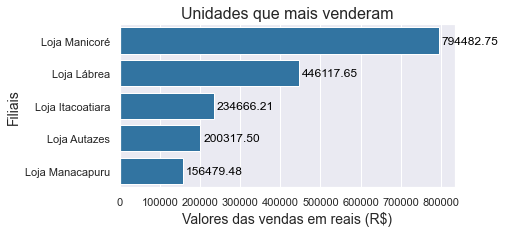

In [23]:
# Visualizar qual filial mais vendeu

plt.figure(figsize=(6, 3)) # Alterar tamanho do gráfico

# gráfico de barras
ax = sns.barplot(data = filiais, x='valor_compra', y='filial', color='tab:blue')

# inserir valores em cada barra
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', padding=3, color='black')

ax.set_xlabel('Valores das vendas em reais (R$)', fontsize=14)
ax.set_ylabel('Filiais', fontsize=14)
plt.title('Unidades que mais venderam', fontsize=16)

plt.show()

<h4> Evolução das vendas de cada filial ao longo do tempo </h4>

In [24]:
# Criar uma novo DataFrame para responder a questão
filiais_vendas = vendas.filter(['data_compra', 'filial', 'valor_compra'])

# Converter a data de venda para mês/ano.
# stype() para converter os valores em datetime64 para que seja possível elaborar
# gráficos de linhas para cada filial.
filiais_vendas['data_compra'] = pd.to_datetime(filiais_vendas.data_compra, format='%Y-%m-%d').\
                                dt.strftime('%Y-%m').\
                                astype('datetime64')

filiais_vendas.head(10)

,data_compra,filial,valor_compra
1638,2020-01-01,Loja Autazes,39.61
1805,2020-01-01,Loja Autazes,21.81
1852,2020-01-01,Loja Autazes,14.42
1864,2020-01-01,Loja Autazes,7.68
1865,2020-01-01,Loja Autazes,46.54
1867,2020-01-01,Loja Autazes,12.08
1901,2020-01-01,Loja Autazes,13.96
2366,2020-01-01,Loja Autazes,69.68
2395,2020-01-01,Loja Autazes,1.08
2428,2020-01-01,Loja Autazes,4.14


In [25]:
# Vamos somar os valores de vendas para cada mês/ano e filial
filiais_vendas = filiais_vendas.groupby(['filial', 'data_compra']).agg('sum').reset_index()

filiais_vendas

,filial,data_compra,valor_compra
0,Loja Autazes,2020-01-01,6259.43
1,Loja Autazes,2020-04-01,20741.84
2,Loja Autazes,2020-05-01,7452.89
3,Loja Autazes,2020-06-01,19865.88
4,Loja Autazes,2020-07-01,2317.63
...,...,...,...
88,Loja Manicoré,2021-08-01,13279.35
89,Loja Manicoré,2021-09-01,17213.01
90,Loja Manicoré,2021-10-01,7343.83
91,Loja Manicoré,2021-11-01,7831.10


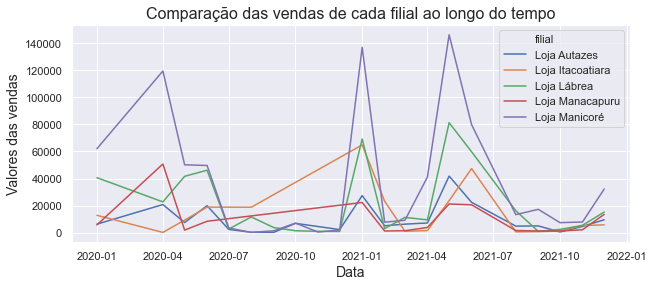

In [26]:
# Visualizar a evolução das vendas de cada filial ao longo do tempo

# alterar a dimensão do gráfico
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.color_palette("bright") # cor do gráfico

# gráfico de linha
sns.lineplot(data=filiais_vendas, x='data_compra', y='valor_compra', hue='filial')

plt.xlabel('Data', fontsize=14)
plt.ylabel('Valores das vendas', fontsize=14)
plt.title('Comparação das vendas de cada filial ao longo do tempo', fontsize=16)

plt.show()

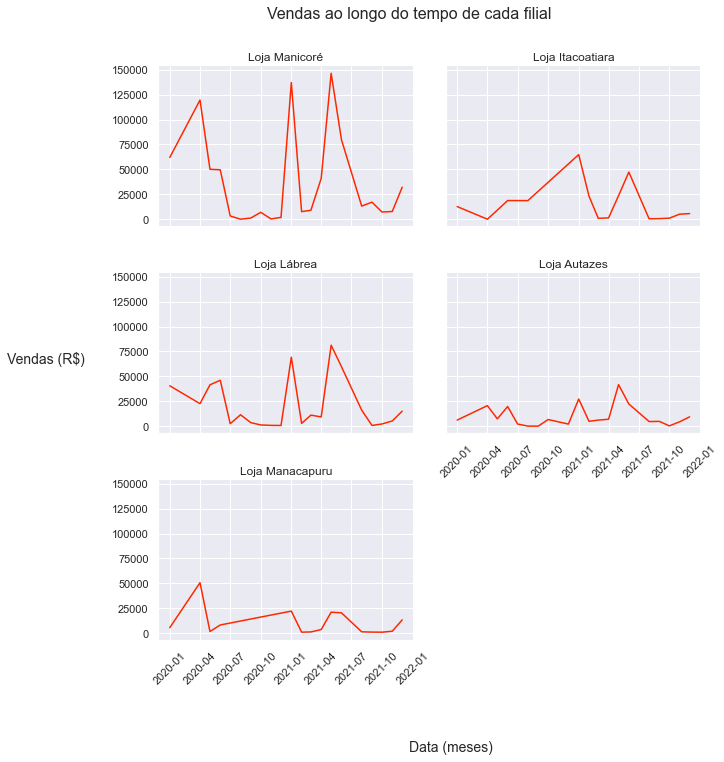

In [27]:
# Visualizar o comportamento das vendas de cada filial separadamente

# Criar a grade de gráficos de linhas para cada filial
g = sns.FacetGrid(filiais_vendas,
                  col = 'filial',
                  col_wrap = 2,
                  col_order = set(filiais_vendas.filial),
                  aspect=1.5
                  )
g.map(sns.lineplot, 'data_compra', "valor_compra", color ='#FF2700')

g.set_titles('{col_name}')
for ax in g.axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
for ax in g.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
g.fig.text(0.5, -.1,'Data (meses)', fontsize=14) # adicionar texto no eixo X
g.fig.text(-0.12, .5,'Vendas (R$)', fontsize=14) # adicionar texto no eixo Y
g.fig.suptitle('Vendas ao longo do tempo de cada filial',
                y = 1.05, fontsize = 16)

plt.show()

<h4> Porcentagem de CPF na nota </h4>

In [28]:
# Cálculo da porcentagem de CPF na nota de todas as filiais juntas

CPF_nota_total = (vendas.CPF_nota.value_counts(normalize=True)*100).round(2)
CPF_nota_total

Sim    85.81
Não    14.19
Name: CPF_nota, dtype: float64

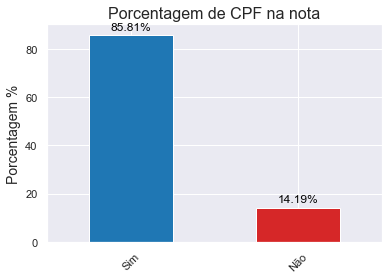

In [29]:
# Visualizar o resultado através de um gráfico de barra

plt.figure(figsize=(6, 4))

colores=['tab:blue', 'tab:red']
ax = CPF_nota_total.plot.bar(color=colores)

ax.bar_label(ax.containers[0], fmt= '%.2f%%', padding=3, color='black')

plt.xticks(rotation=45)
ax.set_ylabel('Porcentagem %', fontsize=14)
plt.title('Porcentagem de CPF na nota', fontsize=16)

plt.show()

<h4> Porcentagem de CPF na nota por filial </h4>

In [30]:
CPF_nota_filial = (vendas
                  .filter(['filial', 'CPF_nota'])
                  .groupby('filial')['CPF_nota'].value_counts()
                  .unstack()
                   )

print(CPF_nota_filial)

CPF_nota          Não   Sim
filial                     
Loja Autazes      207  2506
Loja Itacoatiara   56  1158
Loja Lábrea       455  3617
Loja Manacapuru   543  1250
Loja Manicoré     708  3377


In [31]:
# Transformar os valores em porcentagens

CPF_nota_filial = (CPF_nota_filial.div(CPF_nota_filial.sum(axis=1), axis=0)*100).round(2)

CPF_nota_filial

CPF_nota,Não,Sim
filial,,
Loja Autazes,7.63,92.37
Loja Itacoatiara,4.61,95.39
Loja Lábrea,11.17,88.83
Loja Manacapuru,30.28,69.72
Loja Manicoré,17.33,82.67


In [32]:
# Rearranjar os dados para a visualização
CPF_nota_filial = CPF_nota_filial.stack()
CPF_nota_filial.name = 'porcentagem' # nomear a coluna com as porcentagens
CPF_nota_filial = CPF_nota_filial.reset_index()

CPF_nota_filial

,filial,CPF_nota,porcentagem
0,Loja Autazes,Não,7.63
1,Loja Autazes,Sim,92.37
2,Loja Itacoatiara,Não,4.61
3,Loja Itacoatiara,Sim,95.39
4,Loja Lábrea,Não,11.17
5,Loja Lábrea,Sim,88.83
6,Loja Manacapuru,Não,30.28
7,Loja Manacapuru,Sim,69.72
8,Loja Manicoré,Não,17.33
9,Loja Manicoré,Sim,82.67


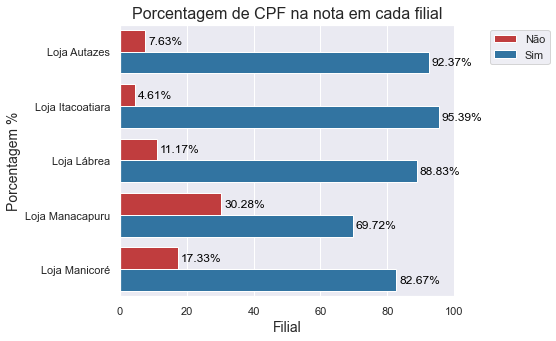

In [33]:
plt.figure(figsize=(6, 5))

colors = ["tab:red", "tab:blue"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data = CPF_nota_filial, x='porcentagem', y='filial', hue='CPF_nota')

for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f%%', padding=3, color='black')
    
plt.xlabel('Filial', fontsize=14)
plt.ylabel('Porcentagem %', fontsize=14)
plt.title('Porcentagem de CPF na nota em cada filial', fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

<h4> Valores médios de compras para cada resposta em relação ao CPF na nota  </h4>

In [34]:
# Vamos analisar se o valor da compra influencia (superficialmente)
# na decisão da pessoa aceitar/exiger colocar o CPF na nota.

CPF_valor_compra = (vendas
                    .filter(['filial', 'CPF_nota', 'valor_compra'])
                    .groupby(['filial', 'CPF_nota']).agg('mean').round(2)
                    .reset_index()
                   )

print(CPF_valor_compra)

             filial CPF_nota  valor_compra
0      Loja Autazes      Não         36.87
1      Loja Autazes      Sim         76.89
2  Loja Itacoatiara      Não         86.82
3  Loja Itacoatiara      Sim        198.45
4       Loja Lábrea      Não         79.38
5       Loja Lábrea      Sim        113.35
6   Loja Manacapuru      Não        142.30
7   Loja Manacapuru      Sim         63.37
8     Loja Manicoré      Não        158.50
9     Loja Manicoré      Sim        202.03


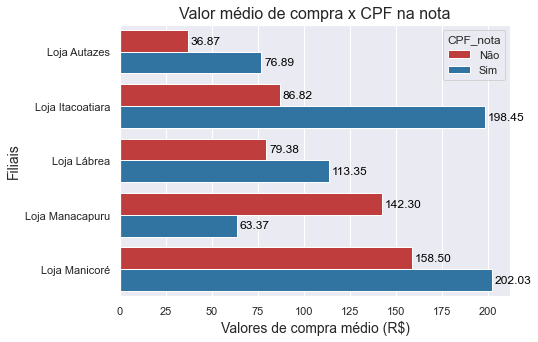

'\nNota: no geral as pessoas que aceitam/exigem CPF na nota são as\nque possuem um valor médio de compra maior comparado as que não compram.\nA exceção está em Manacapuru.\nIsso é apenas uma informação superficial, exigindo uma análise mais profunda sobre o tema.\n'

In [35]:
# Visualizar os valores em um gráfico de barra

plt.figure(figsize=(7, 5))

colors = ["tab:red", "tab:blue"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data = CPF_valor_compra, x='valor_compra', y='filial', hue='CPF_nota')

# inserir rótulos dos valores nas barras por cada tipo de resposta
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f', padding=3, color='black')
    
plt.xlabel('Valores de compra médio (R$)', fontsize=14)
plt.ylabel('Filiais', fontsize=14)
plt.title('Valor médio de compra x CPF na nota', fontsize=16)

plt.show()

"""
Nota: no geral as pessoas que aceitam/exigem CPF na nota são as
que possuem um valor médio de compra maior comparado as que não compram.
A exceção está em Manacapuru.
Isso é apenas uma informação superficial, exigindo uma análise mais profunda sobre o tema.
"""

<h4> Porcentagem de Impostos </h4>

In [36]:
# Porcentagem de impostos de todas as filiais juntas

impostos_total = (vendas
                  .filter(['valor_compra', 'imposto'])
                  .agg('sum')
                  .to_frame('valores').T
                  )

# Criar uma coluna com o valor da porcentagem do imposto sobre o valor de compra total
impostos_total['porcentagem_imposto %'] = (impostos_total.imposto / impostos_total.valor_compra)*100

impostos_total

,valor_compra,imposto,porcentagem_imposto %
valores,1832063.59,82443.0,4.500008


In [37]:
# Vamos calcular a porcentagem de impostos para cada filial

imposto_filial = (vendas
                  .filter(['filial', 'valor_compra', 'imposto'])
                  .groupby('filial').agg('sum')
                  .reset_index()
                  )

imposto_filial.head(10)

,filial,valor_compra,imposto
0,Loja Autazes,200317.50,9014.47
1,Loja Itacoatiara,234666.21,10560.06
2,Loja Lábrea,446117.65,20075.26
3,Loja Manacapuru,156479.48,7041.50
4,Loja Manicoré,794482.75,35751.71


In [38]:
# Criar uma nova coluna com os valores das porcentagens
imposto_filial['porcentagem %'] = (imposto_filial['imposto'] / imposto_filial['valor_compra'])*100

imposto_filial

"""
Devido aos valores serem claros na tabela, não será preciso
visualizar através de um gráfico.
"""

'\nDevido aos valores serem claros na tabela, não será preciso\nvisualizar através de um gráfico.\n'

<h4> Porcentagem de devoluções </h4>

In [39]:
# Vamos calcular a porcentagem de devoluções de todas filiais juntas

devolução_total = vendas.produto_devolvido.value_counts(normalize=True)

devolução_total

Não    0.501693
Sim    0.498307
Name: produto_devolvido, dtype: float64

In [40]:
# Agora vamos calcular a porcentagem de devoluções em cada filial

devolucao_filial = (vendas
                   .filter(['filial', 'produto_devolvido'])
                   .groupby('filial')['produto_devolvido'].value_counts()
                   .unstack()
                   )

devolucao_filial.head(10)

produto_devolvido,Não,Sim
filial,,
Loja Autazes,1368,1345
Loja Itacoatiara,578,636
Loja Lábrea,2047,2025
Loja Manacapuru,892,901
Loja Manicoré,2077,2008


In [41]:
# Transformar os valores em porcentagens
devolucao_filial = devolucao_filial.div(devolucao_filial.sum(axis=1), axis=0)

print(devolucao_filial)

produto_devolvido       Não       Sim
filial                               
Loja Autazes       0.504239  0.495761
Loja Itacoatiara   0.476112  0.523888
Loja Lábrea        0.502701  0.497299
Loja Manacapuru    0.497490  0.502510
Loja Manicoré      0.508446  0.491554


In [42]:
# Rearranjar os dados para a visualização
devolucao_filial = devolucao_filial.stack()
devolucao_filial.name = 'Porcentagem'
devolucao_filial = devolucao_filial.reset_index()

devolucao_filial

,filial,produto_devolvido,Porcentagem
0,Loja Autazes,Não,0.504239
1,Loja Autazes,Sim,0.495761
2,Loja Itacoatiara,Não,0.476112
3,Loja Itacoatiara,Sim,0.523888
4,Loja Lábrea,Não,0.502701
5,Loja Lábrea,Sim,0.497299
6,Loja Manacapuru,Não,0.497490
7,Loja Manacapuru,Sim,0.502510
8,Loja Manicoré,Não,0.508446
9,Loja Manicoré,Sim,0.491554


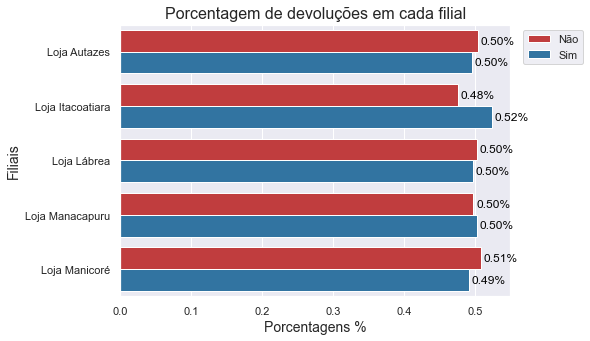

In [43]:
# Visualizar os resultados acima através de um gráfico de barras
plt.figure(figsize=(7, 5))

colors = ["tab:red", "tab:blue"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data = devolucao_filial, x='Porcentagem', y='filial', hue='produto_devolvido')

for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f%%', padding=3, color='black')

plt.xlabel('Porcentagens %', fontsize=14)
plt.ylabel('Filiais', fontsize=14)
plt.title('Porcentagem de devoluções em cada filial', fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

<h4> Principais motivos das devoluções </h4>

In [44]:
# Vamos elencar quais os principais motivos de devoluções dos produtos

devolucao_motivos = (vendas
                     .filter(['num_compra', 'motivo_devolucao'])
                    )

# eliminar as colunas com dados faltantes
devolucao_motivos.dropna(inplace=True)

In [45]:
devolucao_motivos.motivo_devolucao.unique() # lista dos motivos de devoluções

array(['Defeito do produto', 'Antecipação de troca',
       'Insatisfação com o produto', 'Insatisfação com o atendimento',
       'Problema na Entrega'], dtype=object)

In [46]:
# calcular as porcentagens de cada motivo sobre o total das devoluções
devolucao_motivos_contagem = (devolucao_motivos.motivo_devolucao.value_counts(normalize=True)*100).round(2)

# transformar os dados de series para DataFrame
devolucao_motivos_contagem = devolucao_motivos_contagem.to_frame('porcentagem')

devolucao_motivos_contagem

,porcentagem
Defeito do produto,20.81
Insatisfação com o produto,20.03
Problema na Entrega,19.80
Antecipação de troca,19.78
Insatisfação com o atendimento,19.58


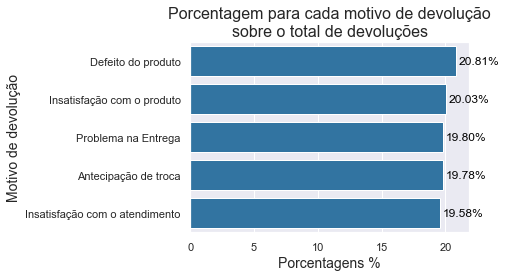

In [47]:
# Visualizar os resultados

plt.figure(figsize=(5, 3.5))

ax = sns.barplot(data = devolucao_motivos_contagem, x='porcentagem', y=devolucao_motivos_contagem.index,
                 color="tab:blue")
ax.bar_label(ax.containers[0], fmt= '%.2f%%', label_type='edge', padding=3, color='black')

plt.xlabel('Porcentagens %', fontsize=14)
plt.ylabel('Motivo de devolução', fontsize=14)
plt.title('Porcentagem para cada motivo de devolução\nsobre o total de devoluções', fontsize=16)

plt.show()

<h4> Vendas por vendedor </h4>

In [48]:
# Vamos calcular o número de vendas de cada vendedor

# Números de vendedores
vendas.vendedor.nunique()

509

In [49]:
# Vendas totais de cada vendedor

# Usuário é o código de cada vendedor
vendedor_média_total = (vendas
                        .filter(['usuario', 'valor_compra'])
                        .groupby(['usuario'])
                        .agg('sum')
                       )

vendedor_média_total

,valor_compra
usuario,
295,4853.08
331,11262.28
370,24481.06
460,18042.31
538,9149.34
...,...
465263,5301.63
465620,3278.03
466079,1375.59


<h4> Os 10 melhores vendedores </h4>

In [50]:
# Vamos identificar quais os 10 colaboradores que mais venderam

vendedores_top10 = (vendas
                    .filter(['usuario', 'vendedor', 'valor_compra'])
                    .groupby(['usuario', 'vendedor']).agg('sum')
                    .sort_values('valor_compra', ascending=False)
                    .iloc[0:10,:]
                    .reset_index()
                   )

print(vendedores_top10)

   usuario  vendedor  valor_compra
0   266970     Bruno      28550.05
1   321972    Heleno      26342.78
2   234336      Kaio      25672.41
3   211203    Brenda      25402.70
4      370  Rosilane      24481.06
5   316759     Karen      23440.43
6   326764    Daiane      21025.40
7      460    Sandra      18042.31
8   219612     Maria      17540.35
9     2391    Vendas      16873.02


Text(0.5, 1.0, 'Os 10 melhores vendedores')

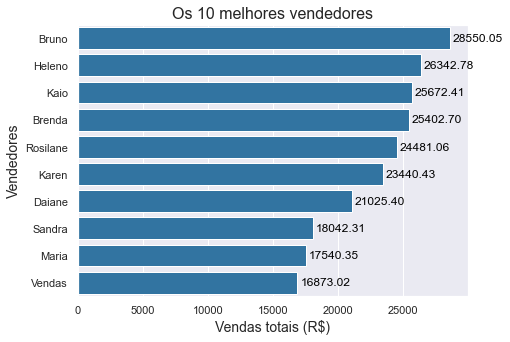

In [51]:
# Visualização

plt.figure(figsize=(7,5))

ax = sns.barplot(data = vendedores_top10, x = 'valor_compra', y = 'vendedor', color='tab:blue')

ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', padding=3, color='black')

plt.xlabel('Vendas totais (R$)', fontsize=14)
plt.ylabel('Vendedores', fontsize=14)
plt.title('Os 10 melhores vendedores', fontsize=16)

<h4> Produtos mais vendidos </h4>

In [52]:
# Cálculo dos produtos mais vendidos de todas as filiais juntas

"""
Cálculo em termos de quantidade vendida. Aqui estou presumindo que 
apenas uma unidade de cada mercadoria foi vendida por compra.
"""

produtos_top10_quantidade = vendas.tipo_mercadoria.value_counts().nlargest(10)

produtos_top10_quantidade

SPLIT 10001 À 18000     103
SPLIT 18001 À 30000     103
FERRO SECO               25
SMART MULTISIM LIVRE     25
PROCESSADOR ALIMENTO     25
KIT COZINHA DE AÇO       25
TANQUINHO/SEMI-AUTOM     25
SYSTEM                   25
SANDUICHEIRA             25
TV 4K DE 60" À 69"       25
Name: tipo_mercadoria, dtype: int64

In [53]:
"""
Agora vamos fazer o cálculo em termos de valores de venda
"""

produtos_top10_compra = (vendas
                  .filter(['tipo_mercadoria', 'valor_compra'])
                  .groupby('tipo_mercadoria').agg('sum')
                  .sort_values('valor_compra', ascending=False)
                  .iloc[0:10,:]
                  .reset_index()
                 )

produtos_top10_compra

,tipo_mercadoria,valor_compra
0,SPLIT 10001 À 18000,210643.92
1,SPLIT 18001 À 30000,155654.16
2,SPLIT ACIMA DE 30000,86670.96
3,"TV LED DE 48"" À 54""",83354.16
4,SPLIT INV18001À30000,71363.28
5,TV OLED / QLED,69099.36
6,AR COND SPLIT 2,52098.96
7,"TV LED DE 21"" À 24""",51909.60
8,"TV LED ACIMA DE 65""",48662.40
9,"TV 4K ATÉ 59""",43440.72


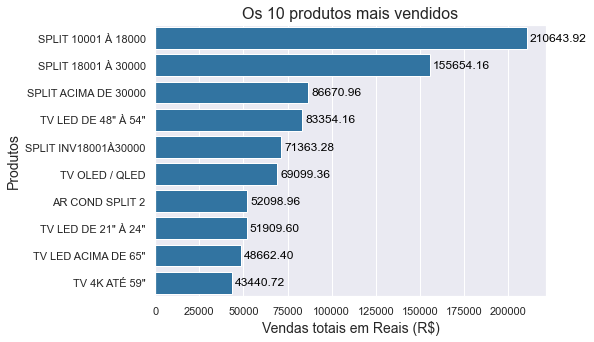

In [54]:
# Visualização dos produtos mais vendidos

plt.figure(figsize=(7, 5))

ax = sns.barplot(data=produtos_top10_compra, x='valor_compra', y='tipo_mercadoria', color='tab:blue')

ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', padding=3, color='black')

plt.xlabel('Vendas totais em Reais (R$)', fontsize=14)
plt.ylabel('Produtos', fontsize=14)
plt.title('Os 10 produtos mais vendidos', fontsize=16)

plt.show()

<h4> Produtos mais vendidos por filials </h4>

In [55]:
produto_filial = vendas.filter(['filial', 'tipo_mercadoria', 'valor_compra'])
           
produto_filial.head(10)

,filial,tipo_mercadoria,valor_compra
1638,Loja Autazes,ACESS DE MAQUIAGEM,39.61
1805,Loja Autazes,MARTELETE,21.81
1852,Loja Autazes,BATERIA P/ AUTOMÓVEL,14.42
1864,Loja Autazes,ENT C/ HORA AGENDADA,7.68
1865,Loja Autazes,RELÓGIO DE PAREDE,46.54
1867,Loja Autazes,BALANÇA ELETRÔNICA,12.08
1901,Loja Autazes,ROUP INFANTIL 4/5 P,13.96
2366,Loja Autazes,CREME DENTAL INF,69.68
2395,Loja Autazes,ANTITUSSÍGENO REF,1.08
2428,Loja Autazes,ANTIVARICOSO SIM,4.14


In [56]:
# Top 5 produtos vendidos por filial
def top_produtos(base, grupo, n=5):
    total = base.groupby(grupo)['valor_compra'].sum()
    return total.nlargest(n)

produtos_vendas = produto_filial.groupby('filial')
top_produtos = produtos_vendas.apply(top_produtos, 'tipo_mercadoria', n=5).reset_index()
top_produtos

,filial,tipo_mercadoria,valor_compra
0,Loja Autazes,SPLIT 18001 À 30000,26467.92
1,Loja Autazes,SPLIT 10001 À 18000,24860.88
2,Loja Autazes,SPLIT 8501 À 10000,10045.68
3,Loja Autazes,"TV 4K ATÉ 59""",9579.36
4,Loja Autazes,"TV LED DE 32""",9091.20
5,Loja Itacoatiara,TV OLED / QLED,45852.00
6,Loja Itacoatiara,"TV LED DE 21"" À 24""",17841.84
7,Loja Itacoatiara,AR COND SPLIT 2,17184.24
8,Loja Itacoatiara,"TV LED DE 48"" À 54""",9811.92
9,Loja Itacoatiara,"TV 4K DE 60"" À 69""",9003.12


<h2> Questão da Planilha 2 </h2>

<h3> Limpeza dos dados </h3>

In [57]:
# Importar a planilha 3 do arquivo em excel

df2 = pd.read_excel('Desafio.xlsx', sheet_name='Dados - Questão 2')

In [58]:
lojas_original = pd.DataFrame(df2)

lojas_original

,cod_Loja,data_compra,inicio,termino,Loja,cod_Produto,produto,EAN,Valor Unitário Sem Imposto,quantidade,valor_total,Impostos,Dinheiro de Volta (Aplicado direto no total)
0,410,2019-07-05 10:30:41,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
1,410,2019-07-05 11:58:18,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
2,410,2019-07-05 14:06:58,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
3,410,2019-07-05 14:50:06,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
4,410,2019-07-05 16:04:56,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,3,9993.87,1128.87,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,430,2019-07-02 09:40:35,2019-07-05,2019-07-20,Unidade Manaus 3,49618556000216,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
895,430,2019-07-02 09:41:57,2019-07-05,2019-07-20,Unidade Manaus 3,49618556000216,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
896,430,2019-07-02 09:39:47,2019-07-05,2019-07-20,Unidade Manaus 3,49618556000216,Smart Pro,190199383180,3000,3,9993.87,1128.87,135.0
897,430,2019-07-02 09:36:06,2019-07-05,2019-07-20,Unidade Manaus 3,49618556000216,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0


In [59]:
# Remover colunas que não serão utilizadas na análise
lojas_original = lojas_original.drop(columns=['inicio','termino','cod_Produto','EAN'])

In [60]:
# Renomear colunas
lojas_original = lojas_original.rename(columns={'cod_Loja': 'cod_loja', 'Loja': 'loja',
                              'Valor Unitário Sem Imposto': 'valor_unitario_sem_imposto',
                              'Impostos': 'impostos',
                              'Dinheiro de Volta (Aplicado direto no total)': 'dinheiro_retornado'})

lojas_original.columns

Index(['cod_loja', 'data_compra', 'loja', 'produto',
       'valor_unitario_sem_imposto', 'quantidade', 'valor_total', 'impostos',
       'dinheiro_retornado'],
      dtype='object')

In [61]:
# Para esta análise não iremos utilizar os valores de tempo,
# mas apenas os valores das datas.
lojas_original.data_compra = pd.to_datetime(lojas_original.data_compra).dt.date

In [62]:
lojas_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cod_loja                    899 non-null    int64  
 1   data_compra                 899 non-null    object 
 2   loja                        899 non-null    object 
 3   produto                     899 non-null    object 
 4   valor_unitario_sem_imposto  899 non-null    int64  
 5   quantidade                  899 non-null    int64  
 6   valor_total                 899 non-null    float64
 7   impostos                    899 non-null    float64
 8   dinheiro_retornado          899 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 63.3+ KB


In [63]:
print(f'Lojas : {lojas_original.cod_loja.unique()}') # veriicar lojas do dataset

Lojas : [410 430]


In [64]:
# Verificar dados faltantes nas colunas
lojas_original.isnull().sum()

cod_loja                      0
data_compra                   0
loja                          0
produto                       0
valor_unitario_sem_imposto    0
quantidade                    0
valor_total                   0
impostos                      0
dinheiro_retornado            0
dtype: int64

In [65]:
lojas_original.head(10)

,cod_loja,data_compra,loja,produto,valor_unitario_sem_imposto,quantidade,valor_total,impostos,dinheiro_retornado
0,410,2019-07-05,Unidade Manaus 1,Smart Pro,3000,1,3331.29,376.29,45.0
1,410,2019-07-05,Unidade Manaus 1,Smart Pro,3000,1,3331.29,376.29,45.0
2,410,2019-07-05,Unidade Manaus 1,Smart Pro,3000,1,3331.29,376.29,45.0
3,410,2019-07-05,Unidade Manaus 1,Smart Pro,3000,1,3331.29,376.29,45.0
4,410,2019-07-05,Unidade Manaus 1,Smart Pro,3000,3,9993.87,1128.87,135.0
5,410,2019-07-05,Unidade Manaus 1,Smart Pro,3000,1,3331.29,376.29,45.0
6,410,2019-07-05,Unidade Manaus 1,Smart Pro,3000,1,3331.29,376.29,45.0
7,410,2019-07-05,Unidade Manaus 1,Smart Pro,3000,1,3331.29,376.29,45.0
8,410,2019-07-05,Unidade Manaus 1,Smart Pro,3000,4,13325.16,1505.16,180.0
9,410,2019-07-05,Unidade Manaus 1,Smart Pro,3000,2,6662.58,752.58,90.0


In [66]:
# Criar uma cópia do DataFrame original

lojas = lojas_original.copy()

<h3> Respondendo as questões da planilha 2 </h3>

<h4> Quanto o dinheiro de volta rendeu em desconto? </h4>

In [67]:
lojas_desconto = (lojas
                  .filter(['cod_loja', 'dinheiro_retornado'])
                  .groupby('cod_loja').agg('sum')
                  .sort_values('dinheiro_retornado', ascending=False)
                  .reset_index()
                 )

lojas_desconto

,cod_loja,dinheiro_retornado
0,410,22706.25
1,430,21847.50


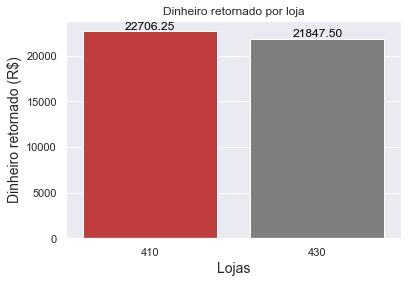

In [68]:
# Visualizar o dinheiro retornado por loja através de um gráfico de barras

colors = ["tab:red", "tab:gray"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data = lojas_desconto, x='cod_loja', y='dinheiro_retornado')
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', color='black')

plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Dinheiro retornado (R$)', fontsize=14)
plt.title('Dinheiro retornado por loja')

plt.show()

In [69]:
# Calcular em termos de porcentagem

lojas_compras = (lojas
                  .filter(['cod_loja', 'valor_total', 'dinheiro_retornado'])
                  .groupby('cod_loja').agg('sum')
                  .sort_values('dinheiro_retornado', ascending=False)
                  .reset_index()
                 )
lojas_compras

,cod_loja,valor_total,dinheiro_retornado
0,410,1.680913e+06,22706.25
1,430,1.617341e+06,21847.50


In [70]:
lojas_compras['porcentagem %'] = (lojas_compras.dinheiro_retornado / lojas_compras.valor_total)*100

lojas_compras

,cod_loja,valor_total,dinheiro_retornado,porcentagem %
0,410,1.680913e+06,22706.25,1.350828
1,430,1.617341e+06,21847.50,1.350828


In [71]:
# Agora vamos calcular por produto

produto_desconto = (lojas
                  .filter(['cod_loja', 'produto', 'dinheiro_retornado'])
                  .groupby(['cod_loja', 'produto']).agg('sum')
                 )

produto_desconto

dinheiro_retornado
cod_loja produto                      
410      Smart Med             5606.25
         Smart Pro            17100.00
430      Smart Med             3487.50
         Smart Pro            18360.00

In [72]:
# Criar uma nova coluna chamada 'porcentagem' contendo as porcentagens
# de dinheiro retornado pro produto para cada loja
def percentual_total(base):
    base['porcentagem'] = (base.dinheiro_retornado / base.dinheiro_retornado.sum()*100).round(2)
    return base

produto_desconto = produto_desconto.groupby('cod_loja').apply(percentual_total)

In [73]:
produto_desconto.reset_index(inplace=True) # retirar o index do DataFrame

# transformar os dados da coluna cod_loja para tipo 'categoria'
produto_desconto.cod_loja = produto_desconto.cod_loja.astype('category')

print(produto_desconto)

  cod_loja    produto  dinheiro_retornado  porcentagem
0      410  Smart Med             5606.25        24.69
1      410  Smart Pro            17100.00        75.31
2      430  Smart Med             3487.50        15.96
3      430  Smart Pro            18360.00        84.04


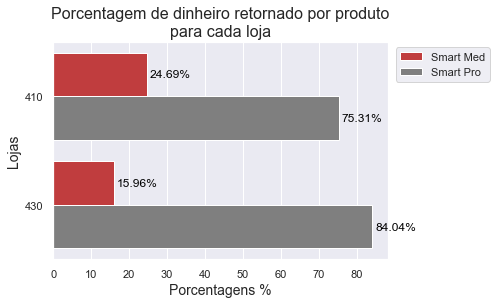

In [74]:
# Visualização

colors = ["tab:red", "tab:gray"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data = produto_desconto, x='porcentagem', y='cod_loja', hue='produto')

for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f%%', padding=3, color='black')

plt.xlabel('Porcentagens %', fontsize=14)
plt.ylabel('Lojas', fontsize=14)
plt.title('Porcentagem de dinheiro retornado por produto\npara cada loja', fontsize=16)

plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1))

plt.show()

<h4> Compras de cada loja ao longo do tempo </h4>

In [75]:
# Vamos verificar as compras de cada loja ao longo do tempo
lojas_compras_tempo = (lojas
                       .filter(['cod_loja', 'data_compra', 'valor_total'])
                       .groupby(['cod_loja', 'data_compra']).agg('sum')
                       .reset_index()
                      )

lojas_compras_tempo

,cod_loja,data_compra,valor_total
0,410,2019-07-02,403918.9125
1,410,2019-07-03,73565.9875
2,410,2019-07-04,72733.1650
3,410,2019-07-05,192381.9975
4,410,2019-07-06,368940.3675
5,410,2019-07-07,364498.6475
6,410,2019-07-08,204874.3350
7,430,2019-07-02,619619.9400
8,430,2019-07-05,167952.5375
9,430,2019-07-06,307311.5025


In [76]:
# transformar os valores da coluna cod_loja para tipo 'categoria'
lojas_compras_tempo.cod_loja = lojas_compras_tempo.cod_loja.astype('category')

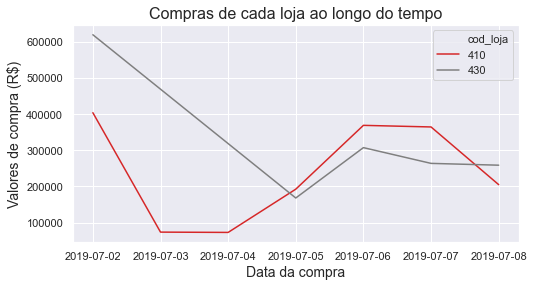

In [77]:
# Visualização

plt.figure(figsize=(8, 4))

colors = ["tab:red", "tab:gray"]
sns.set_palette(sns.color_palette(colors))

sns.lineplot(data = lojas_compras_tempo, x='data_compra', y='valor_total', hue='cod_loja')

plt.xlabel('Data da compra', fontsize=14)
plt.ylabel('Valores de compra (R$)', fontsize=14)
plt.title('Compras de cada loja ao longo do tempo', fontsize=16)

plt.show()